## Bibliotecas

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools

## Dataset Original

In [3]:
dataset = pd.read_csv('/Users/jeanlima/Documents/GitHub/ElectricCurrentRecognition/CreatingDataset/TimeDomain/ElectricCurrentDataset.txt')
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Device
0,0.0,1.66,1.84,2.09,1.66,1.24,0.71,0.00,0.60,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
1,0.0,1.31,1.13,1.59,1.74,1.56,1.35,1.03,0.64,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
2,0.0,0.96,1.74,1.70,2.02,1.66,1.06,0.53,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
3,0.0,1.24,2.27,2.02,1.95,1.56,1.13,0.67,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
4,0.0,1.70,1.77,1.98,1.81,1.13,0.78,0.71,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook


## Combinações de Correntes

In [4]:
classes=[]
for i in dataset['Device']:
    if i not in classes:
        classes.append(i)

In [5]:
#Transformando o Dataframe dataset em matriz
matrix_dataset = list(dataset.as_matrix())

/Users/jeanlima/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [6]:
#transformando cada linha da matriz em um numpy array
for i in range(len(matrix_dataset)):
    matrix_dataset[i] = np.asarray(matrix_dataset[i])

### Dois a dois

In [7]:
for i in range(len(dataset)):
    for j in range(1, len(classes)):
        if i+(200*j)<len(dataset):
            matrix_dataset.append(matrix_dataset[i]+matrix_dataset[i+(200*j)])

### Três a três

In [8]:
num_classes = 4
for i in range(len(dataset)):
    for j in range(1, len(classes)):
        for k in range(1, num_classes):
            if i+(200*j)<len(dataset) and i+(200*(j+num_classes))<len(dataset):
                matrix_dataset.append(matrix_dataset[i] + matrix_dataset[i+(200*j)] + matrix_dataset[i+(200*(j+1))])

In [9]:
#Novo dataset
new_dataset = pd.DataFrame(matrix_dataset)

In [10]:
new_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0.0,1.66,1.84,2.09,1.66,1.24,0.71,0.00,0.60,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
1,0.0,1.31,1.13,1.59,1.74,1.56,1.35,1.03,0.64,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
2,0.0,0.96,1.74,1.70,2.02,1.66,1.06,0.53,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
3,0.0,1.24,2.27,2.02,1.95,1.56,1.13,0.67,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
4,0.0,1.70,1.77,1.98,1.81,1.13,0.78,0.71,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook


### Classes do Dataset

In [11]:
device_position = 300
classes=[]
for i in new_dataset[device_position]:
    if i not in classes:
        classes.append(i)
print('Exemplos\t Classes\n')
for classe in classes:
    num_exemplos = new_dataset[new_dataset[device_position]==classe].count()[0]
    print(num_exemplos, '\t\t',classe)

Exemplos	 Classes

200 		 Notebook
200 		 Ventilador
200 		 Liquidificador
200 		 Geladeira
200 		 NotebookVentilador
200 		 NotebookLiquidificador
200 		 NotebookGeladeira
200 		 VentiladorLiquidificador
200 		 VentiladorGeladeira
200 		 LiquidificadorGeladeira


### Análise dos novos sinais

/Users/jeanlima/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


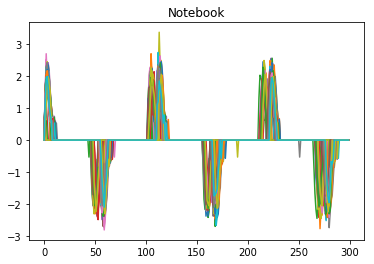

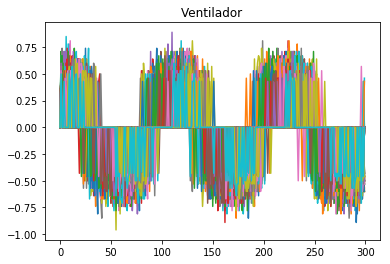

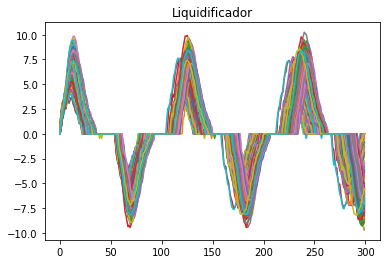

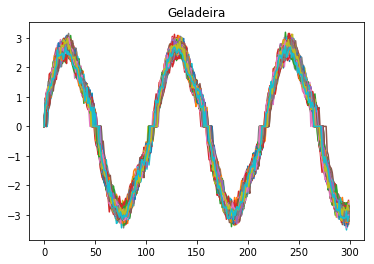

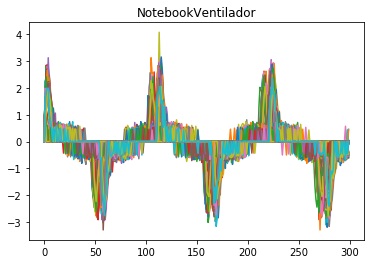

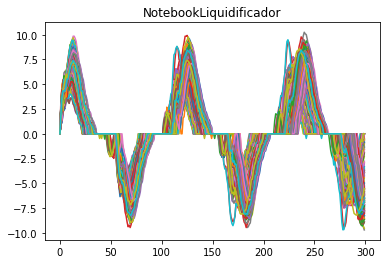

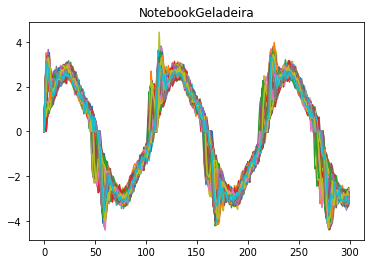

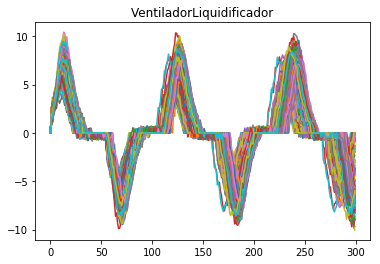

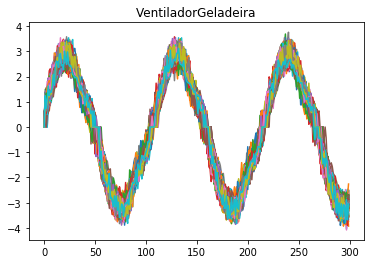

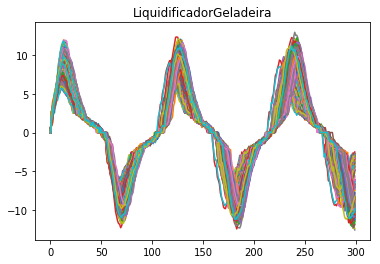

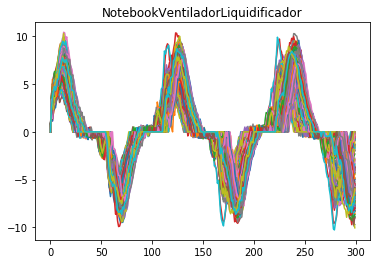

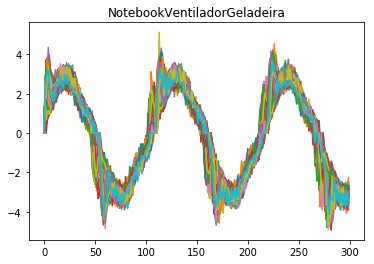

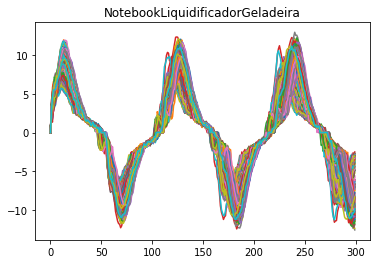

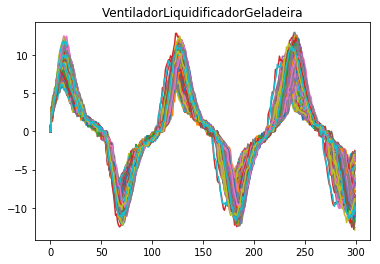

In [70]:
for classe in classes:
    sinal = new_dataset[new_dataset[device_position]==classe]
    sinal.drop([device_position], axis=1, inplace=True)
    for i in range(len(new_dataset)):
        if new_dataset[device_position].loc[i] == classe:
            plt.plot(sinal.loc[i])
    plt.title(classe)
    plt.show()

## Holdout 80/20

In [12]:
y = new_dataset[device_position]
x = new_dataset.drop([device_position], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)

## Treinamento e Teste KNN; K=5

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
previsaokNN = knn.predict(X_test)

print('Acurácia:',accuracy_score(Y_test, previsaokNN))

Acurácia: 0.6525


## Treinamento e Teste NC

In [14]:
nc = NearestCentroid()
nc.fit(X_train, Y_train)
previsaoNC = nc.predict(X_test)

print('Acurácia:',accuracy_score(Y_test, previsaoNC))

Acurácia: 0.7575


## Treinamento e Teste MLP

In [28]:
from math import ceil

#Regra da pirâmide Geométrica para estabelecer número máximo de neurônios
alfa = 0.5
input_neurons = 300
output_neurons = 4
num_neuronios = alfa*((input_neurons* output_neurons)**(1/2))
ceil(num_neuronios)

18

In [33]:
MLP = MLPClassifier(hidden_layer_sizes=(6,6,6),
                     max_iter=1000, 
                     activation='identity', 
                     learning_rate='constant',
                     learning_rate_init=0.00001,
                     batch_size = 128,
                     solver = 'lbfgs')
MLP.fit(X_train, Y_train)
previsaoMLP = MLP.predict(X_test)

print('Acurácia:', accuracy_score(Y_test, previsaoMLP))

Acurácia: 0.955


In [17]:
MLP.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 128,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (5, 5, 5),
 'learning_rate': 'constant',
 'learning_rate_init': 1e-05,
 'max_iter': 1000,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [54]:
MLP.coefs_

[array([[-9.54578131e-02, -1.30211662e-02, -8.31762264e-02,
         -1.18677886e-01,  7.00551938e-02, -6.10599386e-02],
        [-3.37619726e+00, -4.22328652e-02,  7.20403553e-01,
          6.18813371e-01, -6.17940724e-01, -2.28023504e+00],
        [-5.97937374e-01, -1.40323605e-01,  1.85158921e-01,
          7.16253931e-01,  4.03320702e-01,  5.36567383e-01],
        ...,
        [ 2.30479772e-01,  5.90338460e-02, -1.30215810e-01,
          7.98079558e-02, -4.70878781e-04, -1.19304774e-01],
        [ 5.43591956e-02,  7.98359003e-02, -2.78674737e-01,
          1.49905729e-02,  1.80603114e-01,  1.92239486e-01],
        [ 3.57036962e-01, -1.10146524e-01, -6.96274878e-02,
          5.56670703e-02, -1.18159152e-02,  4.15552820e-01]]),
 array([[ 1.10408556,  0.92057245,  0.61757697, -0.43101874, -0.10111316,
          1.00007128],
        [-0.00288234, -0.03455426, -0.95270893, -0.43640517,  0.26757953,
          0.28914105],
        [-1.24659049, -0.19796145, -1.07249953,  0.14781431,  1.0

In [22]:
confusion_matrix(Y_test, previsaoMLP)

array([[37,  0,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0, 43,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  8,  0,  0,  0,  1,  0,  0,  0, 34]])

In [21]:
## Treianamento e teste GNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)
previsaoGNB = gnb.predict(X_test)

accuracy_score(Y_test, previsaoGNB)

0.8875